# WeatherPy
----

### Analysis
* High Temperature near the equator. When latitude between (-20,0) and (0,-20) ,the temperature increases . when the   latitude near poles the temperature  decreases

* When the latitude is 30 degrees, the highest temperature areas mostly deserts .

* When the latitude is less or very high , the humidity is less .But the mid latitude areas having hiest humid         points.

* Wind speed appears to slightly increase as we move away from the equator.





In [9]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   # print (city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)


627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:

# Create base URL and indicate imperial units
url =( 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key)
#url

In [12]:
#Initiate counter for city number below
number = 1
set_count = 0

#Lists for holding required items
city_name = []
lat = []
lng = []
temp = []
humid = []
clouds = []
wind = []
country=[]
Date=[]
max_temp=[]

#Loop through each city, extract required items, and print result
print('------------------------------')
print(' Beginning Data Retrieval ')
print('------------------------------')

for city in cities:
    set_count += 1
    try:
        city_data = (requests.get(url + '&q=' + city)).json()
        #print(city_data)
        city_name.append(city_data['name'])
        Date.append(city_data['dt'])
        country.append(city_data['sys']['country'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp'])
        max_temp.append(city_data['main']['temp_max'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])
        print(f'City number {number} of set{set_count} complete. | {city}')
        number = number + 1
    
    except KeyError:
        print(f'City not found.Skipping...')
        number = number + 1
        
print('------------------------------')
print('End of Records')
print('------------------------------')

------------------------------
 Beginning Data Retrieval 
------------------------------
City number 1 of set1 complete. | caala
City number 2 of set2 complete. | ushibuka
City number 3 of set3 complete. | bluff
City number 4 of set4 complete. | thompson
City number 5 of set5 complete. | kaitangata
City number 6 of set6 complete. | mataura
City number 7 of set7 complete. | kapaa
City not found.Skipping...
City number 9 of set9 complete. | tuatapere
City number 10 of set10 complete. | ginir
City number 11 of set11 complete. | sol-iletsk
City number 12 of set12 complete. | barrow
City number 13 of set13 complete. | saint-philippe
City number 14 of set14 complete. | kodiak
City number 15 of set15 complete. | smolensk
City number 16 of set16 complete. | batagay-alyta
City not found.Skipping...
City number 18 of set18 complete. | halifax
City number 19 of set19 complete. | afrikanda
City number 20 of set20 complete. | ipanguacu
City number 21 of set21 complete. | khatanga
City not found.Ski

City number 185 of set185 complete. | gat
City number 186 of set186 complete. | camocim
City number 187 of set187 complete. | ukiah
City number 188 of set188 complete. | cabo san lucas
City number 189 of set189 complete. | lompoc
City number 190 of set190 complete. | rawson
City number 191 of set191 complete. | bahia blanca
City number 192 of set192 complete. | pangnirtung
City number 193 of set193 complete. | constitucion
City number 194 of set194 complete. | katsuura
City number 195 of set195 complete. | obregon
City number 196 of set196 complete. | yulara
City number 197 of set197 complete. | arraial do cabo
City number 198 of set198 complete. | namibe
City number 199 of set199 complete. | shahrud
City number 200 of set200 complete. | nizhniy kuranakh
City number 201 of set201 complete. | kuusamo
City number 202 of set202 complete. | ribeira grande
City number 203 of set203 complete. | puerto rico
City not found.Skipping...
City not found.Skipping...
City number 206 of set206 comple

City number 367 of set367 complete. | hamilton
City number 368 of set368 complete. | kaa-khem
City number 369 of set369 complete. | kutum
City number 370 of set370 complete. | kysyl-syr
City number 371 of set371 complete. | tucurui
City number 372 of set372 complete. | saint-leu
City number 373 of set373 complete. | chake chake
City number 374 of set374 complete. | platteville
City number 375 of set375 complete. | viedma
City number 376 of set376 complete. | nefteyugansk
City number 377 of set377 complete. | ponta do sol
City number 378 of set378 complete. | clyde river
City number 379 of set379 complete. | kavieng
City not found.Skipping...
City number 381 of set381 complete. | tiksi
City number 382 of set382 complete. | high level
City number 383 of set383 complete. | vattalkundu
City number 384 of set384 complete. | manyana
City number 385 of set385 complete. | tongliao
City number 386 of set386 complete. | troitsko-pechorsk
City number 387 of set387 complete. | kawalu
City number 3

City number 548 of set548 complete. | pulivendla
City number 549 of set549 complete. | abu zabad
City number 550 of set550 complete. | rosetta
City number 551 of set551 complete. | talcahuano
City number 552 of set552 complete. | panaba
City number 553 of set553 complete. | port lincoln
City number 554 of set554 complete. | bulgan
City not found.Skipping...
City number 556 of set556 complete. | kovdor
City number 557 of set557 complete. | pingliang
City number 558 of set558 complete. | the pas
City number 559 of set559 complete. | matay
City number 560 of set560 complete. | labuhan
City number 561 of set561 complete. | haines junction
City not found.Skipping...
City number 563 of set563 complete. | torbat-e jam
City number 564 of set564 complete. | qaqortoq
City not found.Skipping...
City number 566 of set566 complete. | nhulunbuy
City number 567 of set567 complete. | gilgit
City number 568 of set568 complete. | mareeba
City number 569 of set569 complete. | amod
City number 570 of set5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#Create a dataframe with required items
city_data_df = pd.DataFrame({'City': city_name,
                             'Country': country,
                             'Date':Date,
                            'Latitude': lat,
                            'Longitude': lng,
                            'Temperature': temp,
                            'Humidity': humid,
                            'Cloudiness': clouds,
                             'Max_Temp': max_temp,
                            'Wind Speed': wind
                            })

#Save dataframe as csv
pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df.count()

City           565
Country        565
Date           565
Latitude       565
Longitude      565
Temperature    565
Humidity       565
Cloudiness     565
Max_Temp       565
Wind Speed     565
dtype: int64

In [14]:
city_data_df.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Max_Temp,Wind Speed
0,Caala,AO,1553734168,-12.85,15.56,56.47,96,32,56.47,2.48
1,Ushibuka,JP,1553734169,32.19,130.02,57.33,100,92,57.33,1.48
2,Bluff,AU,1553734169,-23.58,149.07,71.50,98,100,71.50,13.22
3,Thompson,CA,1553731200,55.74,-97.86,21.20,57,75,21.20,12.75
4,Kaitangata,NZ,1553734095,-46.28,169.85,62.01,54,0,62.01,5.01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

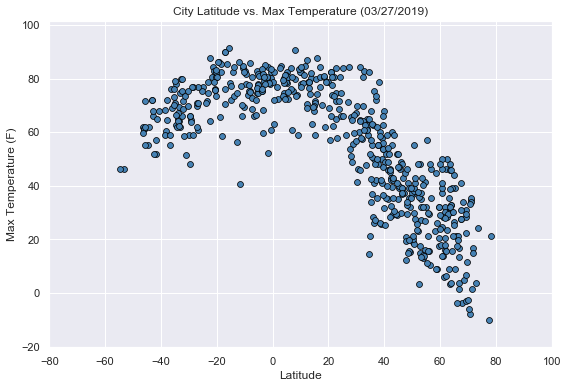

In [15]:
# Set the aesthetic using Seaborn
sns.set()

# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = city_data_df['Latitude'], y = city_data_df['Max_Temp'],
            linewidths = 0.75, edgecolors = 'black', color = 'steelblue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_date = datetime.fromtimestamp(city_data_df.loc[0,"Date"]).strftime('%m/%d/%Y')
plt.title(f"City Latitude vs. Max Temperature ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Modify xlim,ylim
plt.xlim(-80,100)
plt.ylim(min(city_data_df['Max_Temp']) - 10, max(city_data_df['Max_Temp']) + 10)

#plt.grid()
plt.savefig("Lat_vs_Max_Temp.png")
plt.show()


#### Latitude vs. Humidity Plot

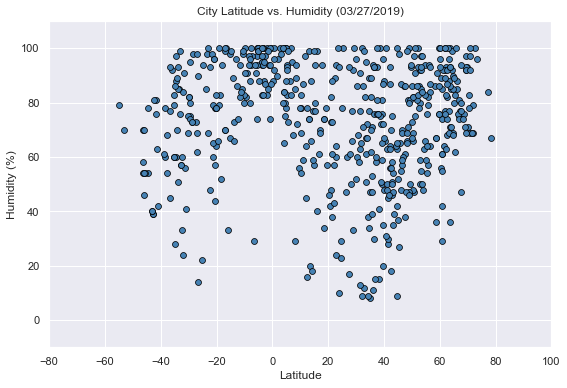

In [16]:
# Set the aesthetic using Seaborn
sns.set()
# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = city_data_df['Latitude'], y = city_data_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'steelblue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_date = datetime.fromtimestamp(city_data_df.loc[0,"Date"]).strftime('%m/%d/%Y')
plt.title(f"City Latitude vs. Humidity ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Modify xlim,ylim
plt.xlim(-80,100)
plt.ylim(-10, 110)
#plt.grid()
plt.savefig("Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

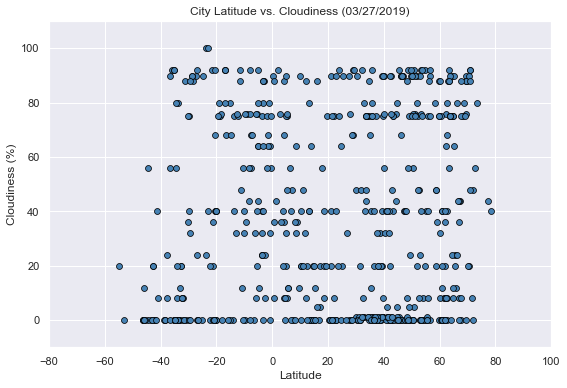

In [17]:
# Set the aesthetic using Seaborn
sns.set()
# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = city_data_df['Latitude'], y = city_data_df['Cloudiness'],
            linewidths = 0.75, edgecolors = 'black', color = 'steelblue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_date = datetime.fromtimestamp(city_data_df.loc[0,"Date"]).strftime('%m/%d/%Y')
plt.title(f"City Latitude vs. Cloudiness ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
#plt.grid()
# Modify xlim ylim
plt.xlim(-80,100)
plt.ylim(-10, 110)
plt.savefig("Lat_vs_cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

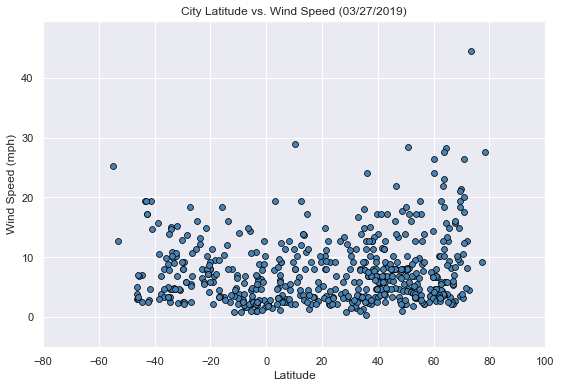

In [18]:

# Set the aesthetic using Seaborn
sns.set()
# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs the max temp
plt.scatter(x = city_data_df['Latitude'], y = city_data_df['Wind Speed'],
            linewidths = 0.75, edgecolors = 'black', color = 'steelblue', s=35)

# Add labeling
# This extracts the date and returns it in the local time zone
weather_date = datetime.fromtimestamp(city_data_df.loc[0,"Date"]).strftime('%m/%d/%Y')
plt.title(f"City Latitude vs. Wind Speed ({weather_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-5, max(city_data_df['Wind Speed']+5))
#plt.grid()
plt.savefig("Lat_vs_windspeed.png")
plt.show()
